Importing required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Function for High-Pass Filter

In [2]:
def apply_high_pass_filter(image):
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

Function for Low-Pass Filter

In [3]:
def apply_low_pass_filter(image, kernel_size=15):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

Combine High-Pass and Low-Pass images

In [4]:
def combine_images(high_pass, low_pass):
    # Resize high-pass filter to match low-pass filter dimensions
    high_pass_resized = cv2.resize(high_pass, (low_pass.shape[1], low_pass.shape[0]))
    # Combine images
    combined = cv2.addWeighted(high_pass_resized, 0.3, low_pass, 0.7, 0)
    return combined

### Main Code execution

Load two images

In [5]:
img1 = cv2.imread('image1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_COLOR)
    
if img1 is None or img2 is None:
    raise Exception("Could not load images. Ensure paths are correct.")

Convert to grayscale for filtering

In [6]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

Apply filters

In [7]:
high_pass_img = apply_high_pass_filter(gray1)
low_pass_img = apply_low_pass_filter(gray2)

Combine filtered images

In [8]:
combined_img = combine_images(high_pass_img, low_pass_img)

Display results using matplotlib

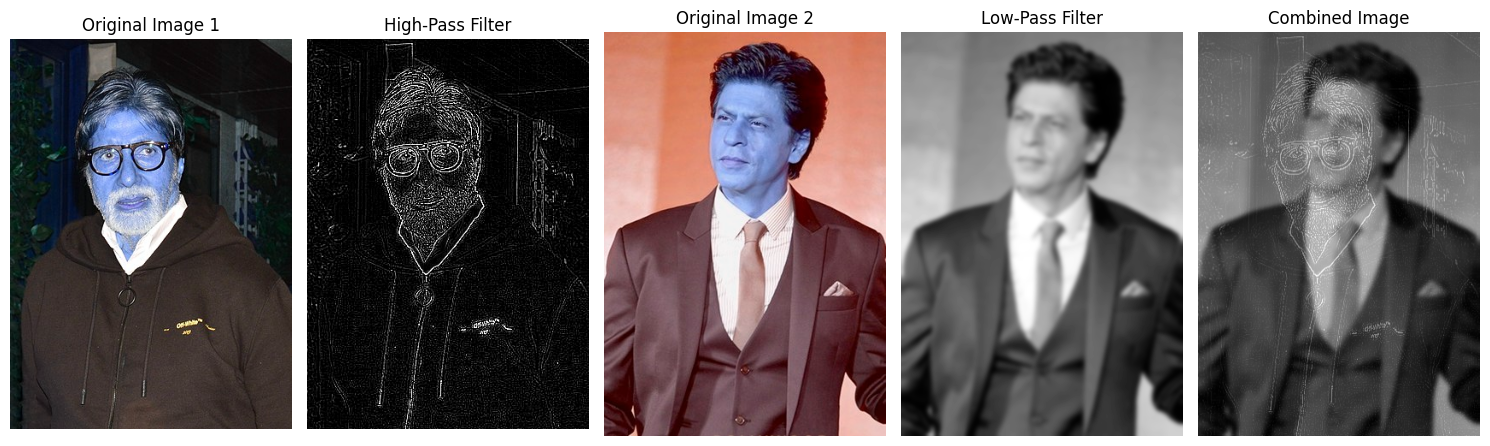

In [9]:
images = [img1, high_pass_img, img2, low_pass_img, combined_img]
titles = ["Original Image 1", "High-Pass Filter", "Original Image 2",
            "Low-Pass Filter", "Combined Image"]

plt.figure(figsize=(15, 6))
for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 5, i + 1)
    cmap = 'gray' if len(img.shape) == 2 else None
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()